__10.1 (PlantGrowth data).__ <br> The PlantGrowth data is an R dataset that
contains results from an experiment on plant growth. The yield of a plant is
measured by the dried weight of the plant. The experiment recorded yields of
plants for a control group and two different treatments. Use a randomization
test to analyze the differences in mean yield for the three groups. Start with
the exploratory data analysis. What conclusions can be inferred from this
sample data?

In [8]:
by(PlantGrowth$weight, PlantGrowth$group, FUN = summary)

PlantGrowth$group: ctrl
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.170   4.550   5.155   5.032   5.293   6.110 
------------------------------------------------------------ 
PlantGrowth$group: trt1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.590   4.207   4.550   4.661   4.870   6.030 
------------------------------------------------------------ 
PlantGrowth$group: trt2
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.920   5.268   5.435   5.526   5.735   6.310 

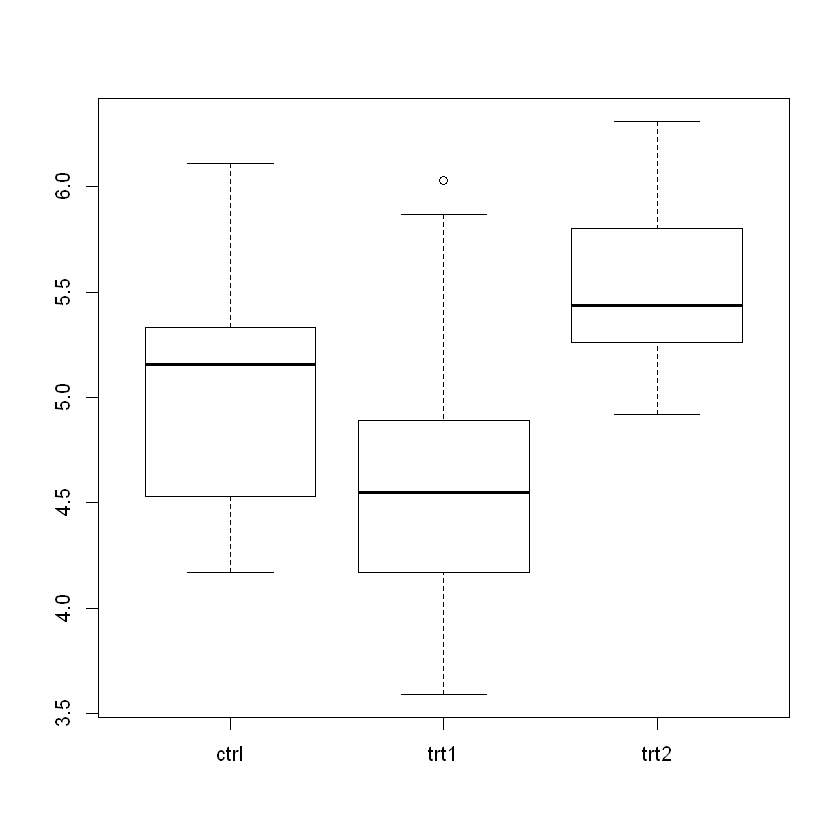

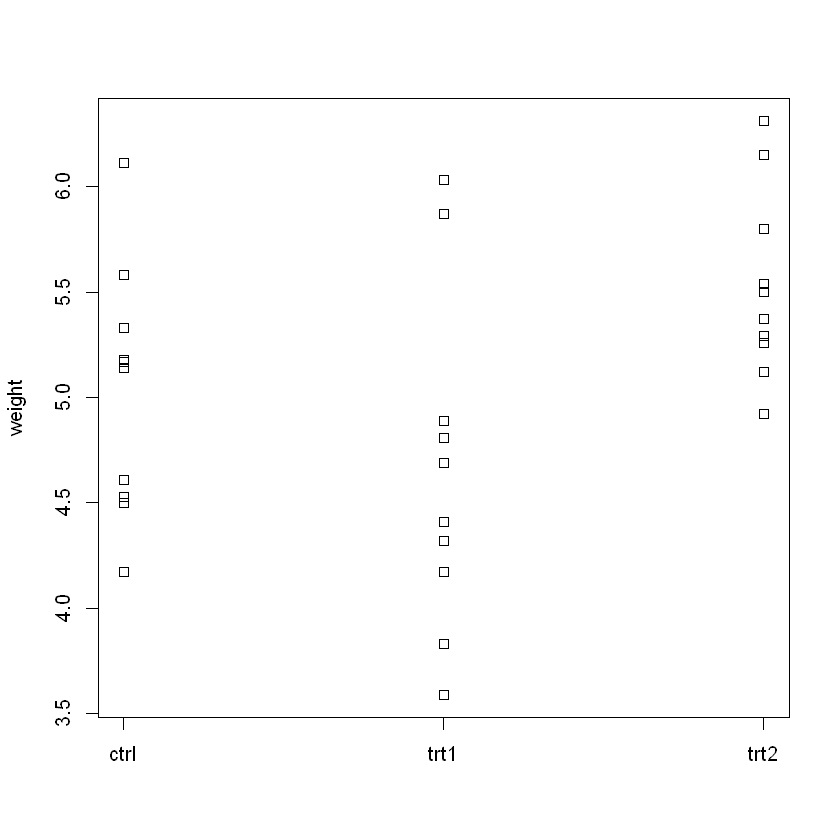

In [10]:
boxplot(weight ~ group, data = PlantGrowth)
stripchart(weight ~ group, data = PlantGrowth, vertical = TRUE)

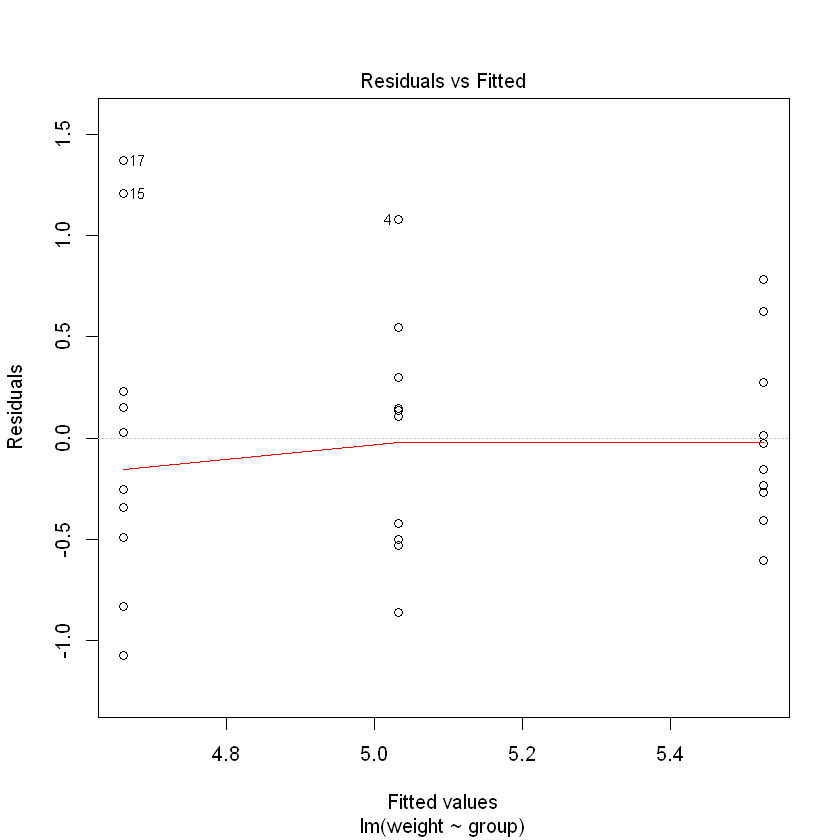

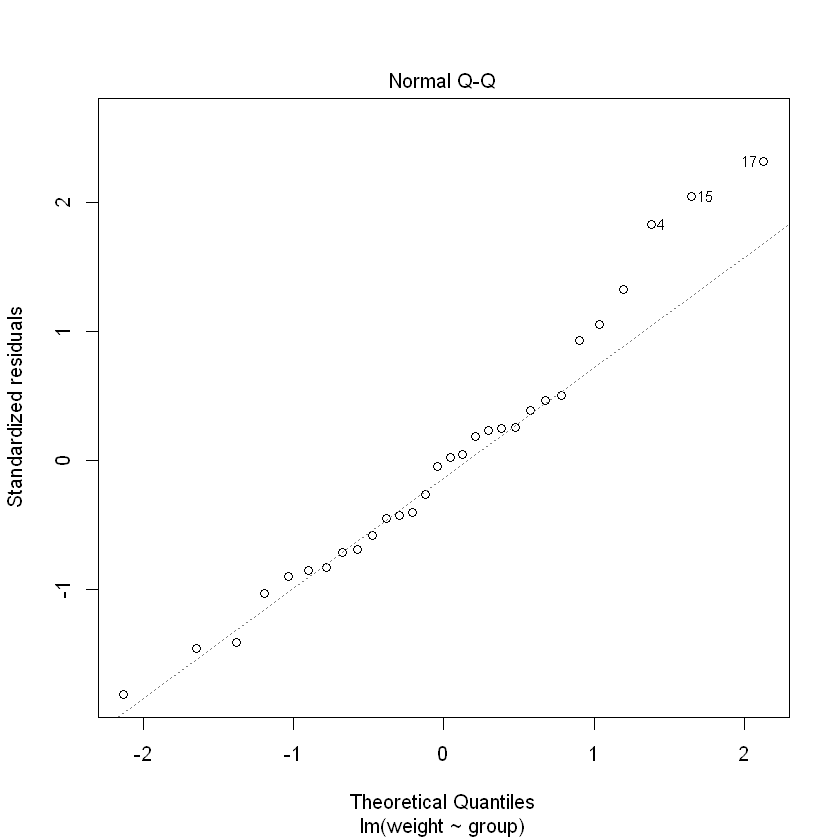

In [12]:
L <- lm(weight ~ group, data = PlantGrowth)
plot(L, which = 1:2)

In [13]:
oneway.test(weight ~ group, data = PlantGrowth)


	One-way analysis of means (not assuming equal variances)

data:  weight and group
F = 5.181, num df = 2.000, denom df = 17.128, p-value = 0.01739


In [23]:
library(coin)
oneway_test(weight ~ group, distribution=approximate(B=999))


	Approximative K-Sample Fisher-Pitman Permutation Test

data:  weight by group (ctrl, trt1, trt2)
chi-squared = 7.6603, p-value = 0.02002


There is a different in mean


__10.2 (flicker data).__  <br> Refer to the flicker data in Example 8.1. Use a randomization test to compare the critical flicker frequency among groups with
different eye colors. State the null hypothesis and your conclusions carefully

In [24]:
flicker = read.table("flicker.txt", header=TRUE)

In [30]:
oneway.test(flicker$Flicker ~ flicker$Color, var.equal = TRUE)


	One-way analysis of means

data:  flicker$Flicker and flicker$Color
F = 4.8023, num df = 2, denom df = 16, p-value = 0.02325


In [29]:
library(coin)
oneway_test(flicker$Flicker ~ flicker$Color, distribution=approximate(B=999))


	Approximative K-Sample Fisher-Pitman Permutation Test

data:  flicker$Flicker by flicker$Color (Blue, Brown, Green)
chi-squared = 6.7521, p-value = 0.02402


__10.4 (airquality data).__<br> Consider the response variable Ozone in the airquality data set in R. Suppose that we are interested in testing the hypothesis
that Ozone differs by Month. Do the assumptions for an ANOVA F-test appear to hold for this data? Carry out the one-way analysis using appropriate
methods for valid inference.

In [5]:
head(airquality)


Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


airquality$Month: 5
[1] 23.61538
------------------------------------------------------------ 
airquality$Month: 6
[1] 29.44444
------------------------------------------------------------ 
airquality$Month: 7
[1] 59.11538
------------------------------------------------------------ 
airquality$Month: 8
[1] 59.96154
------------------------------------------------------------ 
airquality$Month: 9
[1] 31.44828

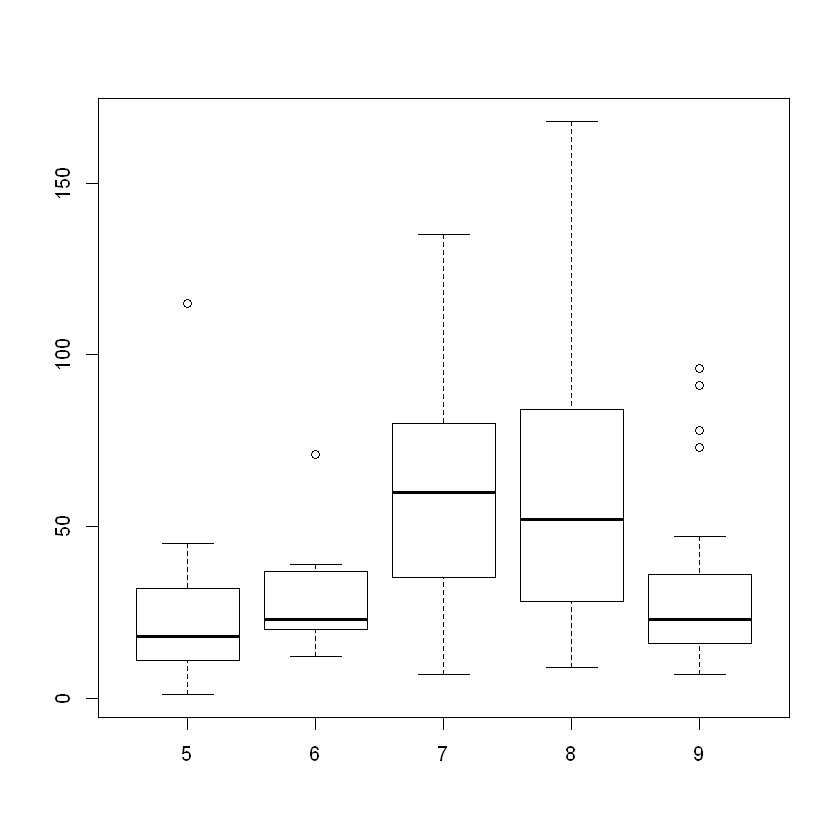

In [15]:
by(airquality$Ozone, airquality$Month, FUN = mean, na.rm = TRUE)
boxplot(Ozone ~ Month, data = airquality)

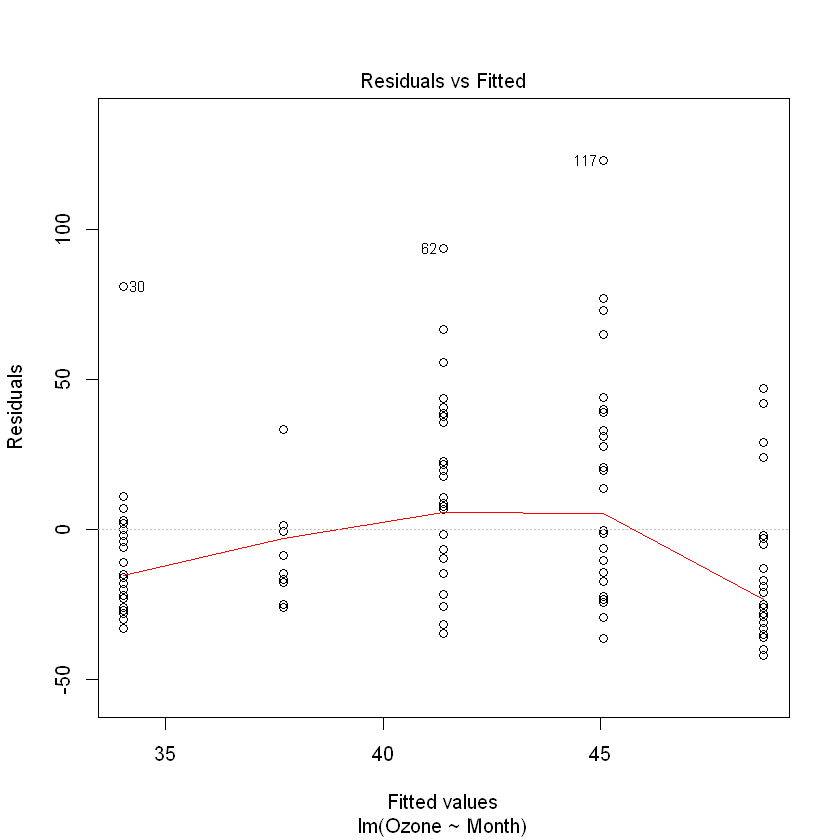

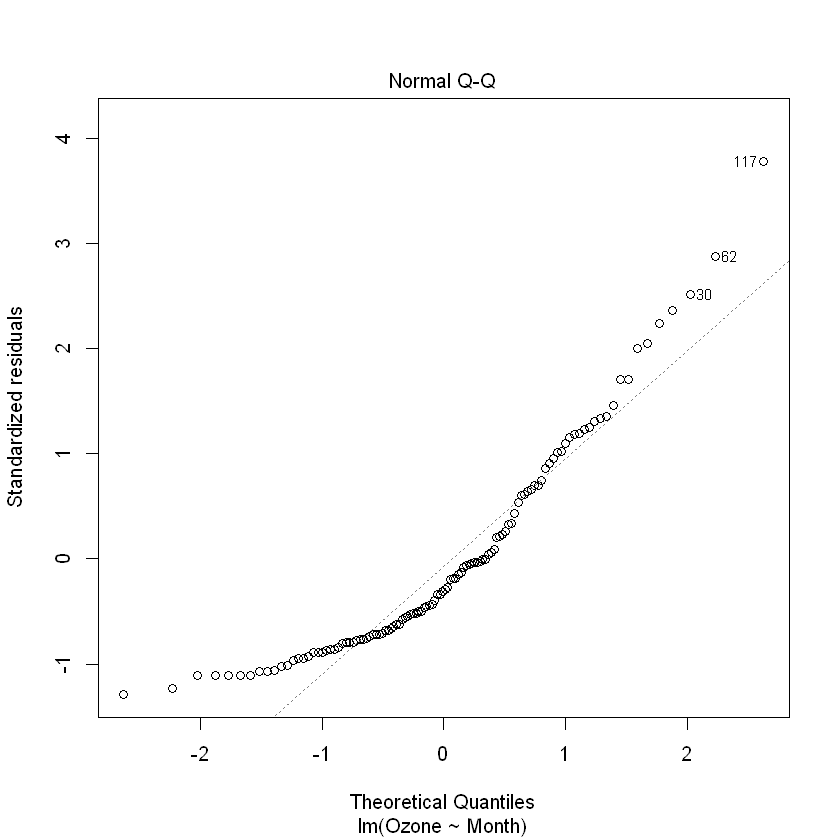

In [17]:
L = lm(Ozone ~ Month, data = airquality)
plot(L, which = 1:2)

In [18]:
oneway.test(Ozone ~ Month, data = airquality)


	One-way analysis of means (not assuming equal variances)

data:  Ozone and Month
F = 8.0267, num df = 4.000, denom df = 42.668, p-value = 6.439e-05


__10.5 (Web hits).__ <br> Another way of exploring the pattern of website counts
in Example 10.3 is to look for differences between seasons. Weeks 1 through
9 correspond to spring months, weeks 10 through 22 to summer months, and
weeks 23 through 35 to fall months. Implement a randomization test to see
if website counts differ between seasons.

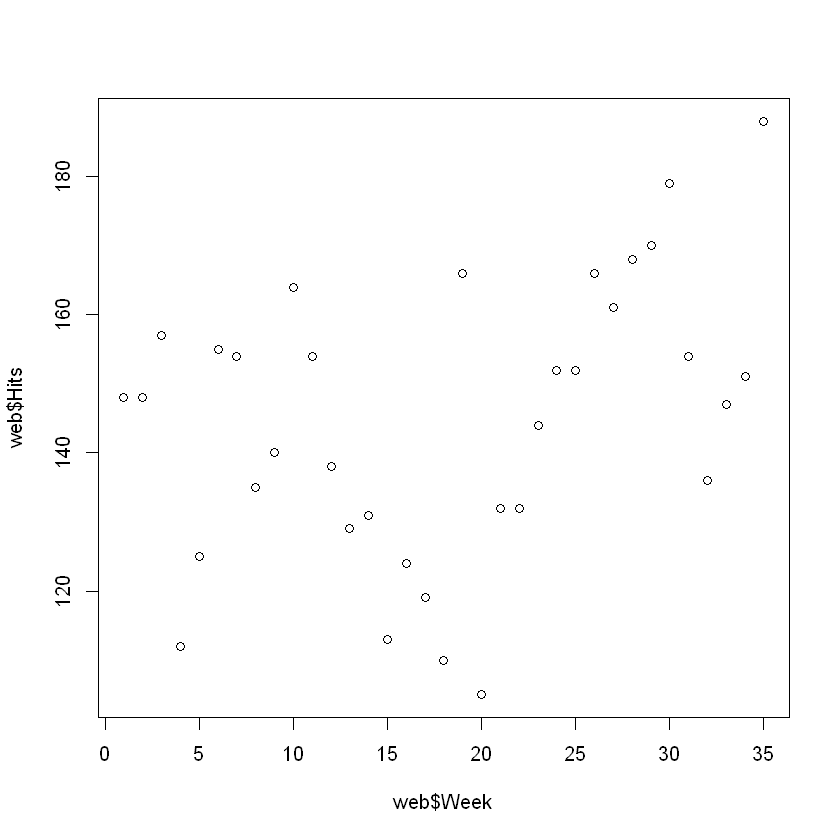

In [27]:
web = read.table("webhits.txt", header=TRUE)
plot(web$Week, web$Hits)

b = c(1,9,22,35)
label = c("Srping", "Summer", "Fall")
season = cut(x= web$Week, breaks = b, right = T, include.lowest = T, labels = label)
web = data.frame(web, season)


In [32]:
rand.oneway = function(response, group, R=199) {
    test = oneway.test(response ~ group)
    observed.F <- test$statistic
    stats = replicate(R, {
        random.labels = sample(group)
        oneway.test(response ~ random.labels)$statistic})
    p = sum(stats >= observed.F) / (R+1)
    test$method = "Randomization test for equal means"
    test$p.value = p
    test
}


In [31]:
rand.oneway(response=web$Hit, group=web$season, R=999)


	Randomization test for equal means

data:  response and group
F = 8.5443, num df = 2.00, denom df = 19.92, p-value = 0.003


In [33]:
oneway.test(web$Hit ~ web$season)


	One-way analysis of means (not assuming equal variances)

data:  web$Hit and web$season
F = 8.5443, num df = 2.00, denom df = 19.92, p-value = 0.002092


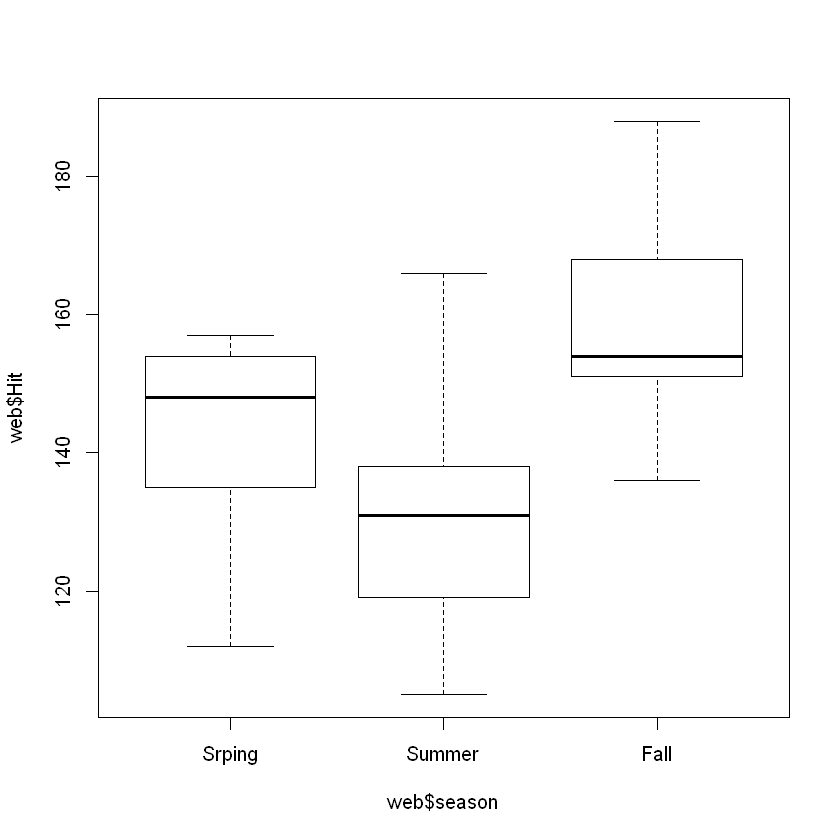

In [34]:
plot(web$Hit ~ web$season)

__10.6 (Web hits, cont.).__ <br>  In Example 10.3, revise the rand.correlation
function so that it also displays a probability histogram of the generated
rank statistics in stats. Identify the observed statistic robs on the plot using
abline(v = observed.r).


Observed.r =  0.3217489

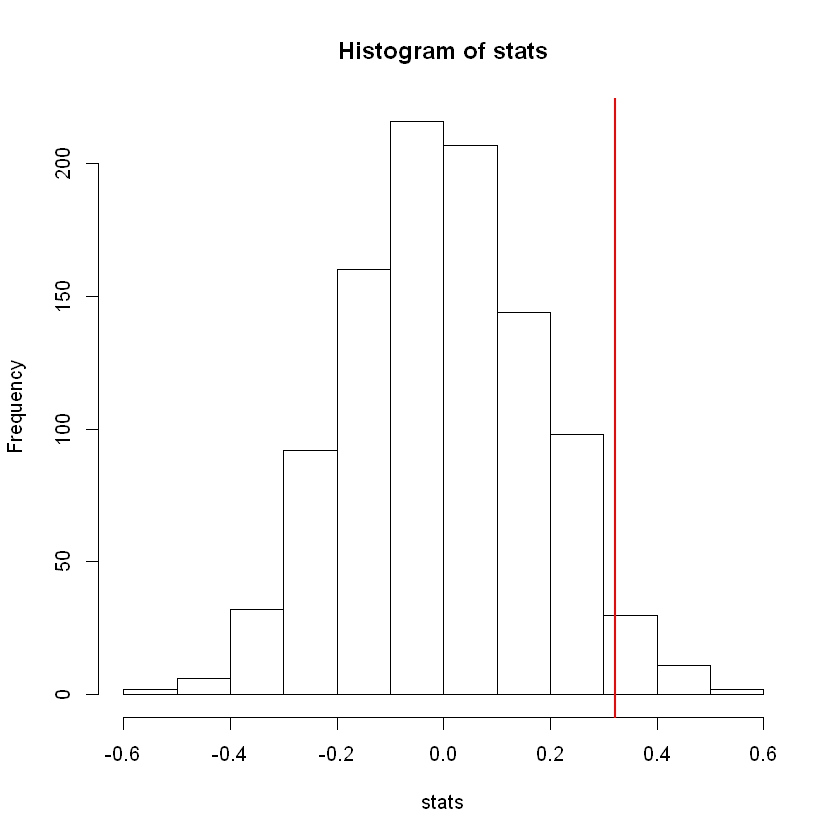

In [56]:
rand.correlation = function(x, y, R=199) {
    ranks.x = rank(x)
    ranks.y = rank(y)

    observed.r = cor(ranks.x, ranks.y)
    cat("\nObserved.r = ", observed.r)

    stats = replicate(R, {
        random.ranks = sample(ranks.y)
        cor(ranks.x, random.ranks)
    })
    hist(stats)
    p.value = sum(stats >= observed.r) / (R + 1)
    list(observed.r = observed.r, p.value = p.value)
    abline(v = observed.r, col = "red", lwd = 2)
}

rand.correlation(web$Week, web$Hits, R=1000)

__10.7 (Computing rank correlations). __ <br> For the website hits data in Exam
ple 10.3, we could have used the result of Spearman’s rank correlation statistic
(cor with method="spearman") to handle the calculation of the rank corre
lation statistics. Revise the function rand.correlation in Example 10.3 so
that it uses cor to compute the rank correlation. For example, if our paired
data is in vectors x and y, then we can obtain the rank correlation by
r = cor(x, y, method="spearman")


Observed.r =  0.3217489

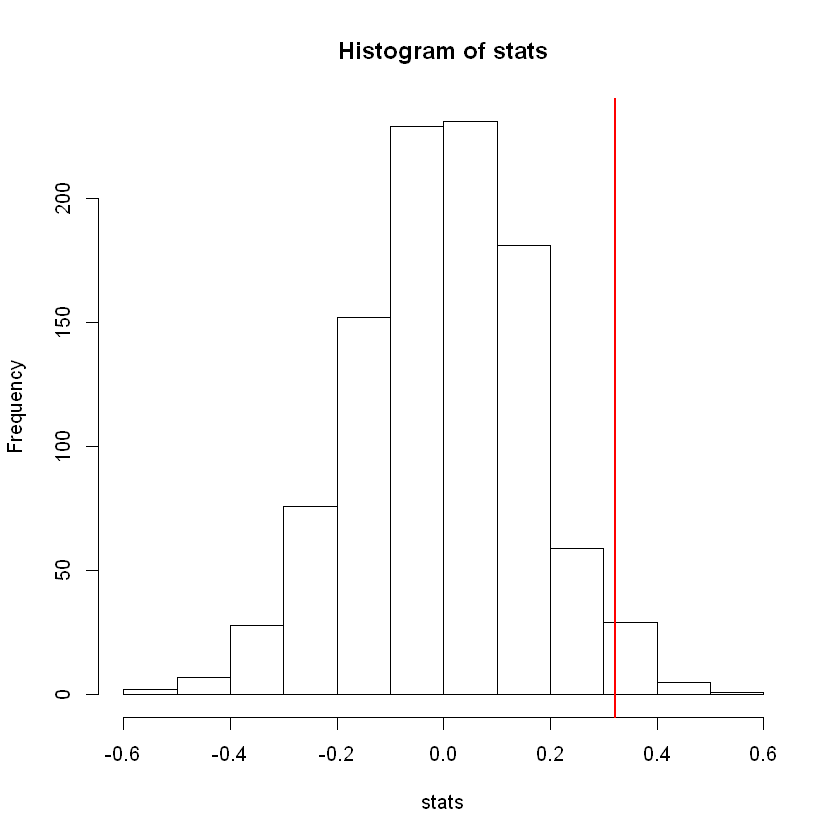

In [67]:
rand.correlation = function(x, y, R=199) {
    ranks.x = rank(x)
    ranks.y = rank(y)

    observed.r = cor(ranks.x, ranks.y, method = "spearman")
    cat("\nObserved.r = ", observed.r)

    stats = replicate(R, {
        random.ranks = sample(ranks.y)
        cor(ranks.x, random.ranks, method = "spearman")
    })
    p.value = sum(stats >= observed.r) / (R + 1)
    list(observed.r = observed.r, p.value = p.value)
    hist(stats)
    abline(v = observed.r, col = "red", lwd = 2)
}

cr = rand.correlation(web$Week, web$Hits, R=1000)